In [2]:
import pandas as pd
tdada_train_path = r"C:\Users\Vera\Documents\Python Scripts\titanic\train.csv" #r to make raw string
tdada_train_data = pd.read_csv(tdada_train_path, engine='python') 
tdada_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
tdada_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
tdada_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
tdada_train_data = tdada_train_data.drop(['Name','Ticket','Cabin'],axis=1) #drop insignificant columns

In [11]:
tdada_train_data.isna().sum()/(len(tdada_train_data))*100 #percentage of NaNs in every column

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

'Age' has significant amount of NaNs. If we drop it, we'll lose a lot of training data. Let's see what it can be replaced with.

In [16]:
import matplotlib.pyplot as plt

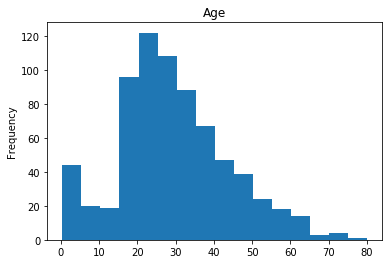

In [30]:
tdada_train_data['Age'].plot(kind='hist',title='Age',bins=16)
plt.show()

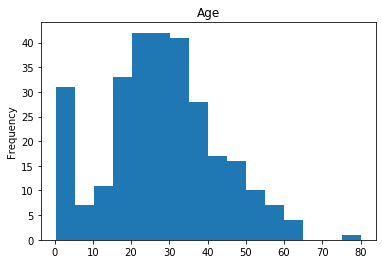

In [29]:
alive = tdada_train_data.loc[tdada_train_data['Survived'] == 1]
alive['Age'].plot(kind='hist',title='Age',bins=16)
plt.show()

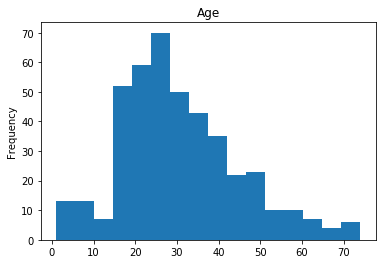

In [28]:
dead = tdada_train_data.loc[tdada_train_data['Survived'] == 0]
dead['Age'].plot(kind='hist',title='Age',bins=16)
plt.show()

The most frequent age both in 'alive' and 'dead' groups is around 25-30 y. So we can replace NaNs with median value.

In [35]:
tdada_train_data['Age'] = tdada_train_data['Age'].fillna(tdada_train_data['Age'].median())
tdada_train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [13]:
tdada_train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Let's convert 'Embarked' and 'Sex' to numbers:

In [41]:
tdada_train_data.Sex = tdada_train_data.Sex.map({'male':1, 'female':0}) 

Note: tdada_train_data.Sex is equal to tdada_train_data['Sex'] 

In [44]:
tdada_train_data = pd.get_dummies(tdada_train_data, dummy_na=True, columns=['Embarked',])

Let's split our df into training and checking parts (by random)

In [47]:
to_check = tdada_train_data.sample(frac =.05) #5% to check
to_check

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
843,844,0,3,1,34.5,0,0,6.4375,1,0,0,0
685,686,0,2,1,25.0,1,2,41.5792,1,0,0,0
730,731,1,1,0,29.0,0,0,211.3375,0,0,1,0
664,665,1,3,1,20.0,1,0,7.9250,0,0,1,0
142,143,1,3,0,24.0,1,0,15.8500,0,0,1,0
718,719,0,3,1,28.0,0,0,15.5000,0,1,0,0
605,606,0,3,1,36.0,1,0,15.5500,0,0,1,0
682,683,0,3,1,20.0,0,0,9.2250,0,0,1,0
42,43,0,3,1,28.0,0,0,7.8958,1,0,0,0
425,426,0,3,1,28.0,0,0,7.2500,0,0,1,0


In [50]:
to_learn = tdada_train_data.loc[~tdada_train_data['PassengerId'].isin(to_check['PassengerId'])]
to_learn

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,2,1,1,0,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1,0
3,4,1,1,0,35.0,1,0,53.1000,0,0,1,0
4,5,0,3,1,35.0,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,0,1,0
887,888,1,1,0,19.0,0,0,30.0000,0,0,1,0
888,889,0,3,0,28.0,1,2,23.4500,0,0,1,0
889,890,1,1,1,26.0,0,0,30.0000,1,0,0,0


In [84]:
import numpy as np

In [114]:
crl= tdada_train_data.drop('PassengerId',axis=1).corr(method ='pearson')

In [113]:
crl['Survived'].drop('Survived',axis = 0).abs().sort_values(ascending=False) #analyzing correlations 

Sex             0.543351
Pclass          0.338481
Fare            0.257307
Embarked_C      0.168240
Embarked_S      0.155660
Parch           0.081629
Age             0.064910
Embarked_nan    0.060095
SibSp           0.035322
Embarked_Q      0.003650
Name: Survived, dtype: float64

Prepairing training set:

In [66]:
X = to_learn.drop(['Survived','PassengerId'], axis=1)
y = to_learn['Survived']

In [67]:
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier

In [77]:
clf = KNeighborsClassifier(n_neighbors=8, weights = 'distance')
clf.fit(X, y)
y_predicted = clf.predict(to_check.drop(['Survived','PassengerId'], axis=1))
np.mean(y_predicted==to_check['Survived'])

0.7111111111111111

To simplify the task let's drop any data which has no sufficient corr with 'Survived'.

In [119]:
clf = KNeighborsClassifier(n_neighbors=10, weights = 'distance')
X = to_learn[['Sex','Pclass','Fare']]
y = to_learn['Survived']
clf.fit(X, y)
y_predicted = clf.predict(to_check[['Sex','Pclass','Fare']])
np.mean(y_predicted==to_check['Survived'])

0.8

In [161]:
X = tdada_train_data[['Sex','Pclass','Fare']] #train on full data
y = tdada_train_data['Survived']
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [174]:
tdada_test_path = r"C:\Users\Vera\Documents\Python Scripts\titanic\test.csv" #r to make raw string
tdada_test_data = pd.read_csv(tdada_test_path, engine='python') 
tdada_test_data.Sex = tdada_test_data.Sex.map({'male':1, 'female':0}) 

In [175]:
tdada_test_data.loc[tdada_test_data['Fare']==0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",1,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",1,49.0,0,0,112058,0.0,B52 B54 B56,S


In [176]:
tdada_test_data.Fare=tdada_test_data.Fare.mask(tdada_test_data.Fare == 0, 55) #1st class

In [177]:
tdada_test_data.loc[tdada_test_data['Fare'].isna()] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S


In [180]:
tdada_test_data.Fare=tdada_test_data.Fare.mask(tdada_test_data.Fare.isna(), 3) #3rd class
tdada_test_data_essentials = tdada_test_data[['Sex','Pclass','Fare']]

In [181]:
tdada_test_data_essentials.dropna() #check that nothing dropped

,Sex,Pclass,Fare
0,1,3,7.8292
1,0,3,7.0000
2,1,2,9.6875
3,1,3,8.6625
4,0,3,12.2875
...,...,...,...
413,1,3,8.0500
414,0,1,108.9000
415,1,3,7.2500
416,1,3,8.0500


In [186]:
y_predicted = clf.predict(tdada_test_data_essentials)

In [188]:
id_series = tdada_test_data['PassengerId']
y_series = pd.Series(y_predicted) 
frame = { 'PassengerId': id_series, 'Survived': y_series }  
submit = pd.DataFrame(frame)
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [185]:
submit.to_csv(r"C:\Users\Vera\Documents\Python Scripts\titanic\submit.csv", index=False)